In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from scipy.interpolate import griddata
import os

In [42]:
shapefile_path = r"E:\Downloads\bgd_adm_bbs_20201113_shp\bgd_adm_bbs_20201113_SHP\bgd_admbnda_adm0_bbs_20201113.shp"

In [43]:
asses_esm_path = r"F:\ACCESS ESM 1 5\Precipitation\Historical\Historical CSV"
asses_esm_files = [f for f in os.listdir(asses_esm_path) if f.endswith('.csv')]
asses_esm_df_arr = [pd.read_csv(os.path.join(asses_esm_path, f),  parse_dates=True, index_col="Date") for f in asses_esm_files]

In [44]:
asses_esm_arr = []
for df in asses_esm_df_arr:
    df = df.dropna()
    df['historical'] = df['historical'] * 86400  # Convert from mm/day to mm/month
    df.rename({'historical': 'ACCESS-ESM1-5', df.columns[1]: 'district'}, axis=1, inplace=True)
    asses_esm_arr.append(df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5020\2359467629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['historical'] = df['historical'] * 86400  # Convert from mm/day to mm/month
C:\Users\Acer\AppData\Local\Temp\ipykernel_5020\2359467629.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'historical': 'ACCESS-ESM1-5', df.columns[1]: 'district'}, axis=1, inplace=True)


In [45]:
asses_esm_arr[0]

,Precipitation,district,Station_Id,lat,lon,ACCESS-ESM1-5
Date,,,,,,
1978-12-01,0.0,Barisal,1.0,22.716667,90.366667,0.019074
1978-12-02,0.0,Barisal,1.0,22.716667,90.366667,0.003725
1978-12-03,0.0,Barisal,1.0,22.716667,90.366667,0.019147
1978-12-04,0.0,Barisal,1.0,22.716667,90.366667,0.001778
1978-12-05,0.0,Barisal,1.0,22.716667,90.366667,0.001803
...,...,...,...,...,...,...
2014-12-27,0.0,Barisal,1.0,22.716667,90.366667,0.290636
2014-12-28,0.0,Barisal,1.0,22.716667,90.366667,2.740169
2014-12-29,0.0,Barisal,1.0,22.716667,90.366667,4.486967


In [46]:
can_esm_path = r"F:\CAN ESM 5\Historical\Historical CSV"
can_esm_files = [f for f in os.listdir(can_esm_path) if f.endswith('.csv')]
can_esm_arr = [pd.read_csv(os.path.join(can_esm_path, f),  parse_dates=True, index_col="Date") for f in can_esm_files]

In [47]:
model_df = []
for i, df in enumerate(asses_esm_arr):
    if df['district'].iloc[0] == can_esm_arr[i]['district'].iloc[0]:
        df['CanESM5'] = can_esm_arr[i]['CanESM5']
        model_df.append(df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5020\1874754911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CanESM5'] = can_esm_arr[i]['CanESM5']
C:\Users\Acer\AppData\Local\Temp\ipykernel_5020\1874754911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CanESM5'] = can_esm_arr[i]['CanESM5']
C:\Users\Acer\AppData\Local\Temp\ipykernel_5020\1874754911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [48]:
mean = []

for df in model_df:
    data = {}
    data['lat'] = df['lat'].iloc[0]
    data['lon'] = df['lon'].iloc[0]
    data['district'] = df['district'].iloc[0]
    data['Station_Id'] = df['Station_Id'].iloc[0]
    for var in ['ACCESS-ESM1-5', 'CanESM5', 'Precipitation']:
        data[var] = df[var].groupby(df.index.year).sum().mean()
    mean.append(data)
mean_df = pd.DataFrame(mean)
mean_df.rename(columns={'Precipitation': 'Obs. Precipitation'}, inplace=True)
mean_df.head()

,lat,lon,district,Station_Id,ACCESS-ESM1-5,CanESM5,Obs. Precipitation
0,22.716667,90.366667,Barisal,1.0,1197.940467,980.385300,2019.486486
1,22.683333,90.650000,Bhola,2.0,1197.941640,980.385300,2128.108108
2,24.850000,89.366667,Bogra,3.0,3264.981087,1007.162111,1762.250000
3,23.233333,90.700000,Chandpur,4.0,1998.353746,1007.744195,2154.228571
4,22.216667,91.800000,Chittagong MMO,5.0,1160.265312,1602.647490,2867.939394


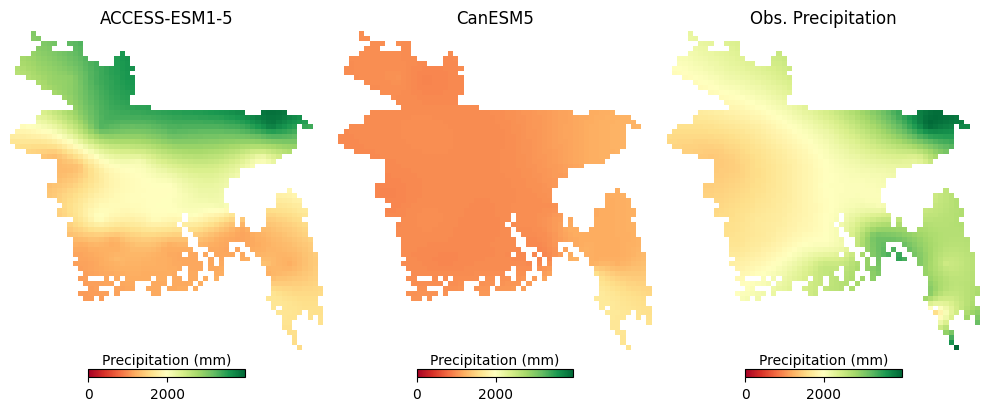

In [49]:
from Interpolate_Clip_Map import interpolated_clipped_map

interpolated_clipped_map(
    df=mean_df,
    variables=['ACCESS-ESM1-5', 'CanESM5', 'Obs. Precipitation'],
    shapefile_path=shapefile_path,
    cmap='RdYlGn',
    figsize=(10, 4.5),
    cbar_label='Precipitation (mm)',
    method='kriging',
    rows=1,
    cols=3
)

In [50]:
model_df = [df.rename(columns={'Precipitation': 'Obs. Precipitation'}) for df in model_df]

C:\Users\Acer\AppData\Local\Temp\ipykernel_5020\920223215.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])


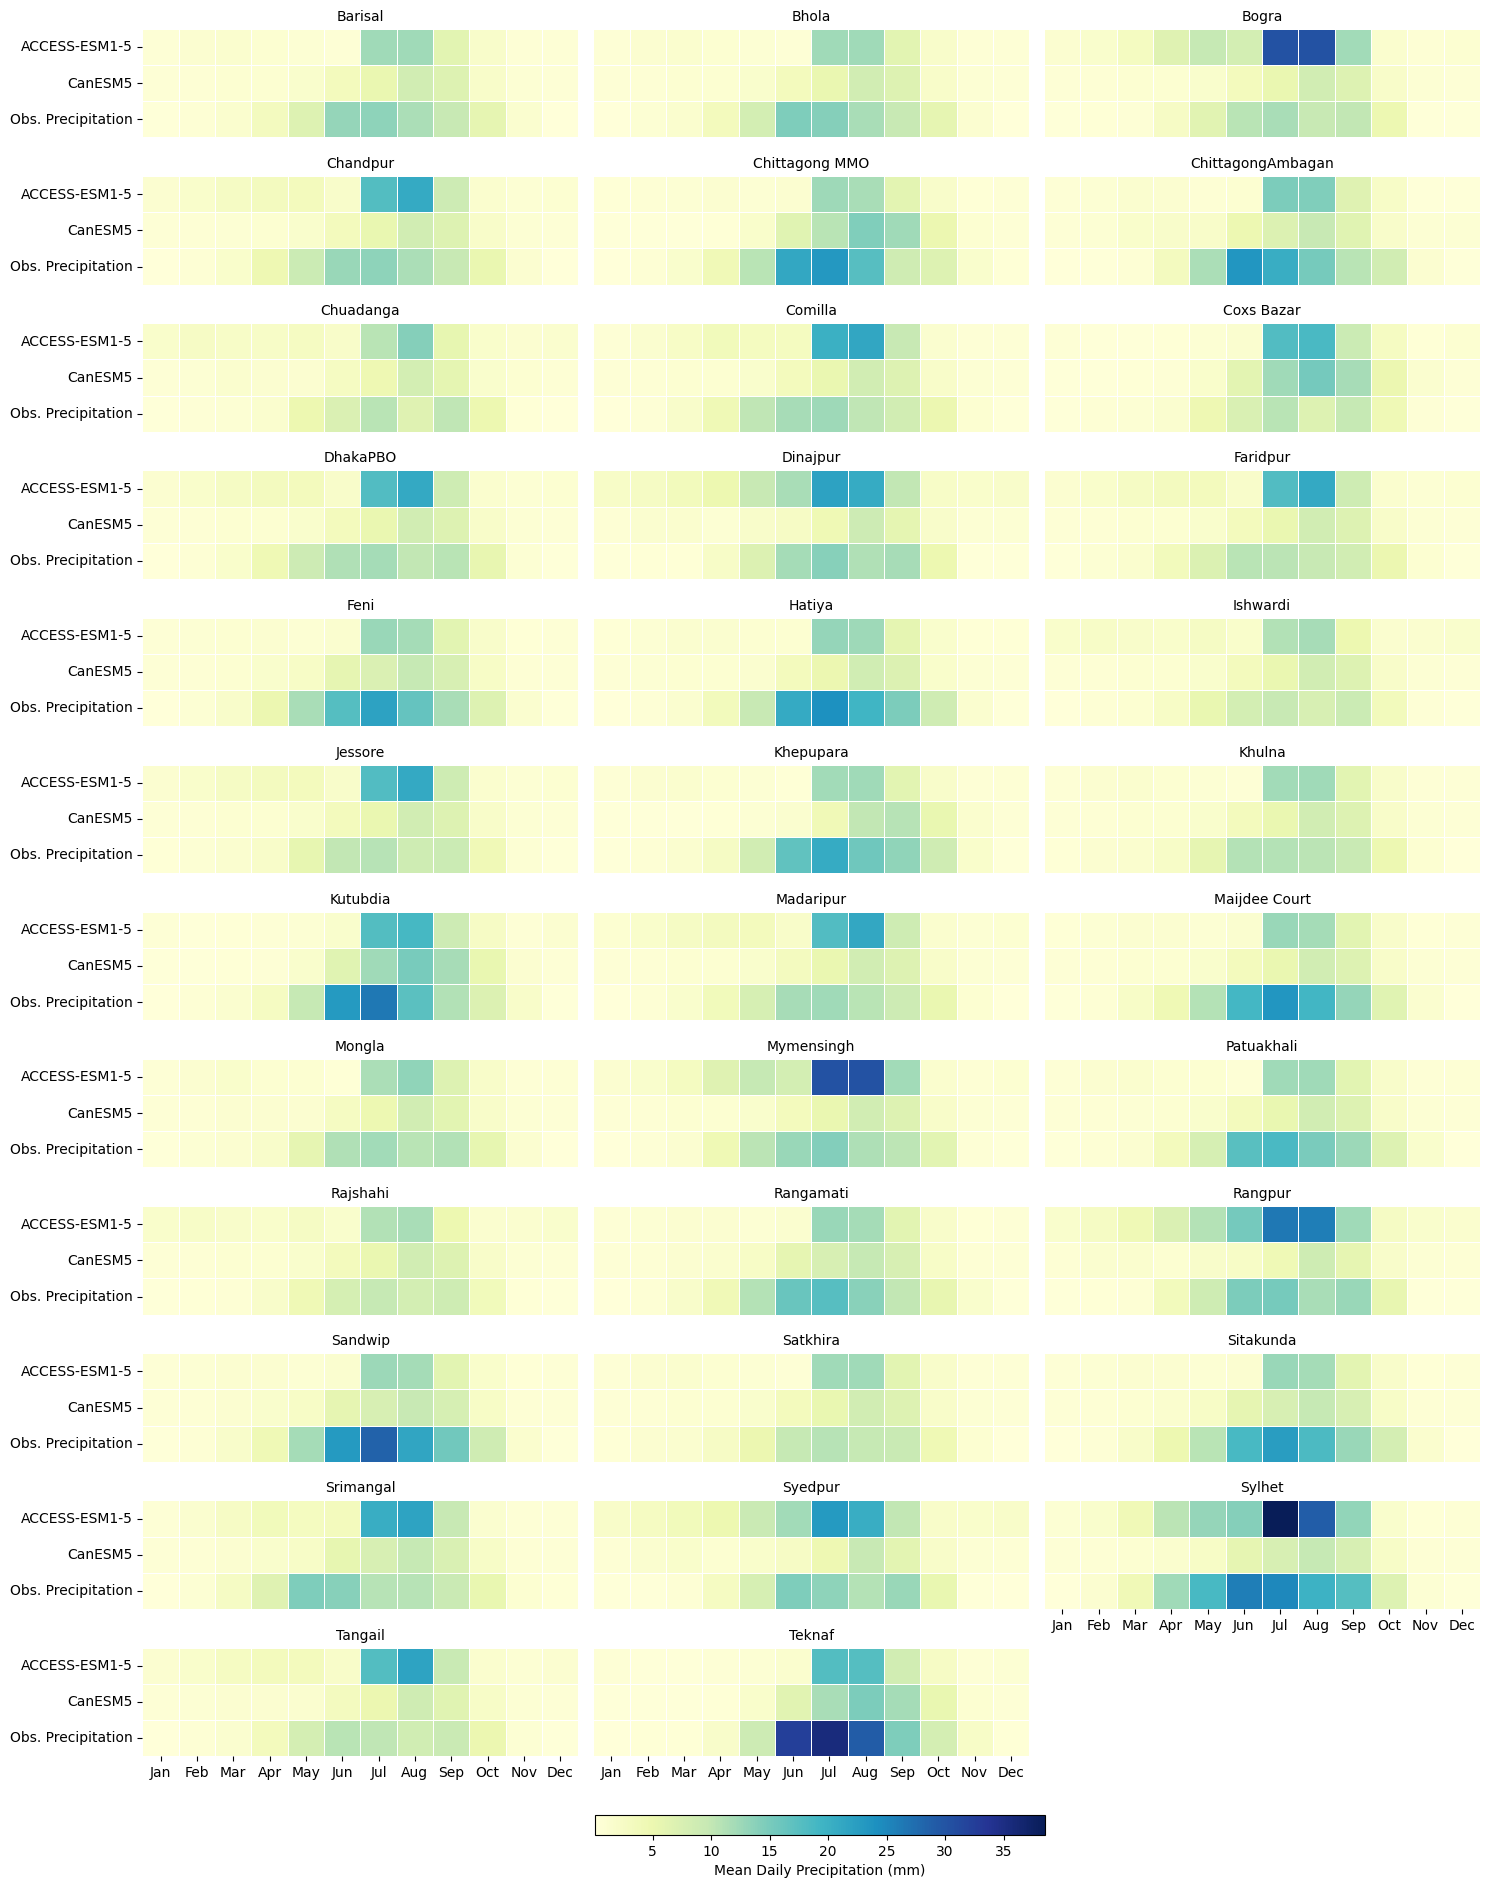

In [51]:
fig, ax = plt.subplots(figsize=(15, 20), nrows=12, ncols=3)
ax = ax.flatten()

# Pre-compute global vmin and vmax for consistent color scale
vmin, vmax = float('inf'), float('-inf')
for df in model_df:
    df = df.loc[:, ['ACCESS-ESM1-5', 'CanESM5', 'Obs. Precipitation']]
    
    # mask = df[df.columns] <= 1
    # monthly_mean = df[mask].groupby(df.index.month).count().T
    #=========montly mean precipitation==========
    # monthly_mean = df.resample('MS').sum()
    # monthly_mean = monthly_mean.groupby(monthly_mean.index.month).mean().T
    # ==========Mean daily precipitation in a month==========
    monthly_mean = df.groupby(df.index.month).mean().T
    vmin = min(vmin, monthly_mean.min().min())
    vmax = max(vmax, monthly_mean.max().max())

# Plot all subplots
for i, df in enumerate(model_df):
    district = df['district'].iloc[0]
    df = df.loc[:, ['ACCESS-ESM1-5', 'CanESM5', 'Obs. Precipitation']]
    
    # mask = df[df.columns] <= 1
    # monthly_mean = df[mask].groupby(df.index.month).count().T
    #=========montly mean precipitation==========
    # monthly_mean = df.resample('MS').sum()
    # monthly_mean = monthly_mean.groupby(monthly_mean.index.month).mean().T
    # ==========Mean daily precipitation in a month==========
    monthly_mean = df.groupby(df.index.month).mean().T
    # monthly_mean.rename(index={'Precipitation': 'Obs. Precipitation'}, inplace=True)

    sns.heatmap(
        monthly_mean,
        ax=ax[i],
        vmin=vmin,
        vmax=vmax,
        cmap="YlGnBu",
        cbar=False,  # disable individual colorbars
        fmt=".1f",
        linewidths=0.5,
        xticklabels=False,
        yticklabels=(i % 3 == 0),  # only first column shows y-ticks
    )
    ax[i].set_title(district, fontsize=10)


    ax[i].set_xlabel("")


ax[-2].set_xticks(np.arange(12) + 0.5)
ax[-2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[-3].set_xticks(np.arange(12) + 0.5)
ax[-3].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[-4].set_xticks(np.arange(12) + 0.5)
ax[-4].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Add shared horizontal colorbar at the bottom
cbar_ax = fig.add_axes([0.4, 0.08, 0.3, 0.01])  # [left, bottom, width, height]
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Mean Daily Precipitation (mm)')
ax[-1].set_axis_off()  # Hide the last axis to avoid clutter
plt.tight_layout(rect=[0, 0.1, 1, 1]) 
plt.show()

In [52]:
model_df[0][['ACCESS-ESM1-5', 'CanESM5', 'Obs. Precipitation']].corr()

,ACCESS-ESM1-5,CanESM5,Obs. Precipitation
ACCESS-ESM1-5,1.000000,0.169889,0.074662
CanESM5,0.169889,1.000000,0.107480
Obs. Precipitation,0.074662,0.107480,1.000000


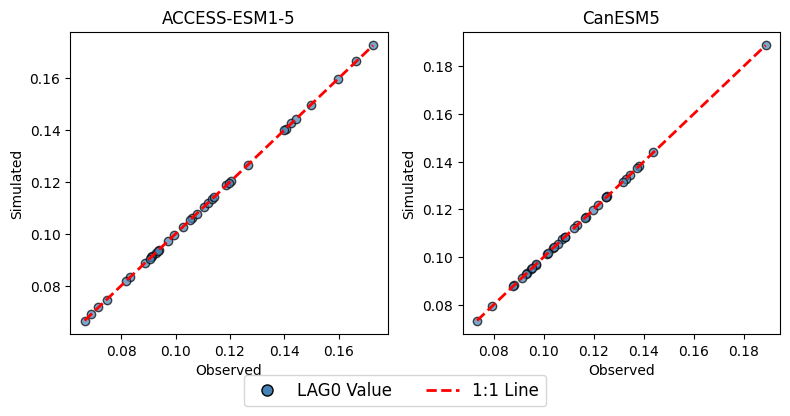

In [53]:
from Scatter_Identity_Line import scatter_with_identity_line
# =============================================Monthly plots===============================================================
# data_arr=[df[df.columns[0:12]].groupby(df.index.month).mean() for df in data_arr]
# Average monthly values for each model like for all january the mean of all january values thus get 12 valus for 12 month
#==========================================================================================================================
# =============================================Annual plots===============================================================
# data_arr=[df[df.columns[0:12]].groupby(df.index.year).sum() for df in data_arr]
# Summ all values annually for each model thus get 1 value for each year
#==========================================================================================================================
scatter_with_identity_line(
    data_arr=[df[['ACCESS-ESM1-5', 'CanESM5', 'Obs. Precipitation']] for df in model_df],
    observed_col='Obs. Precipitation',
    model_cols=['ACCESS-ESM1-5', 'CanESM5'],
    figsize=(8, 4),
    rows=1,
    cols=2,
    method='lag0'  # or 'mean', 'std', 'lag1'
)

In [54]:
model_df[0]

,Obs. Precipitation,district,Station_Id,lat,lon,ACCESS-ESM1-5,CanESM5
Date,,,,,,,
1978-12-01,0.0,Barisal,1.0,22.716667,90.366667,0.019074,0.000000
1978-12-02,0.0,Barisal,1.0,22.716667,90.366667,0.003725,0.000000
1978-12-03,0.0,Barisal,1.0,22.716667,90.366667,0.019147,0.039777
1978-12-04,0.0,Barisal,1.0,22.716667,90.366667,0.001778,0.011275
1978-12-05,0.0,Barisal,1.0,22.716667,90.366667,0.001803,0.046901
...,...,...,...,...,...,...,...
2014-12-27,0.0,Barisal,1.0,22.716667,90.366667,0.290636,4.000620
2014-12-28,0.0,Barisal,1.0,22.716667,90.366667,2.740169,0.001258
2014-12-29,0.0,Barisal,1.0,22.716667,90.366667,4.486967,0.115459


In [55]:
from Quantile_Mapping import eQM_precip_replace
from scipy.stats import percentileofscore
def eQM_precip_replace(ref_dataset, model_present, model_future, wet_day_threshold=0.1):
    """
    Empirical Quantile Mapping for precipitation (Replace method).
    Applies correction only to wet days and handles drizzle bias.
    """
    ref_wet = ref_dataset[ref_dataset >= wet_day_threshold]
    model_wet = model_present[model_present >= wet_day_threshold]

    model_present_corrected = np.zeros_like(model_present)
    model_future_corrected = np.zeros_like(model_future)

    if len(ref_wet) == 0 or len(model_wet) == 0:
        # If no wet days, return zeros to avoid crash
        raise ValueError('No wet days found in reference or model present data.')

    for i, val in enumerate(model_present):
        if val < wet_day_threshold:
            model_present_corrected[i] = 0.0
        else:
            perc = percentileofscore(model_wet, val)
            perc = np.clip(perc, 0, 100)  # Make sure it's within bounds
            model_present_corrected[i] = np.percentile(ref_wet, perc)

    for i, val in enumerate(model_future):
        if val < wet_day_threshold:
            model_future_corrected[i] = 0.0
        else:
            perc = percentileofscore(model_wet, val)
            perc = np.clip(perc, 0, 100)
            model_future_corrected[i] = np.percentile(ref_wet, perc)

    return model_present_corrected, model_future_corrected

In [56]:
# model_df = [
#     df.reindex(
#         pd.date_range(
#             start=f"{df.index.min().year}-01-01",
#             end=f"{df.index.max().year}-12-31",
#             freq='D'
#         )
#     ).rename_axis(df.index.name).bfill()
#     for df in model_df
# ]

In [ ]:
from bias_correction import nested_bias_correction
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor

# Your bias correction and QM function must be pickleable to work with multiprocessing

def process_df(df):
    df = df[['Obs. Precipitation', 'ACCESS-ESM1-5', 'CanESM5']].resample('MS').sum()

    df['ACCESS-ESM1-5-eQM'] = eQM_precip_replace(df['Obs. Precipitation'], df['ACCESS-ESM1-5'], df['ACCESS-ESM1-5'])[0]
    df['ACCESS-ESM1-5-NBC'] = nested_bias_correction(df['Obs. Precipitation'], df['ACCESS-ESM1-5'])

    df['CanESM5-eQM'] = eQM_precip_replace(df['Obs. Precipitation'], df['CanESM5'], df['CanESM5'])[0]
    df['CanESM5-NBC'] = nested_bias_correction(df['Obs. Precipitation'], df['CanESM5'])

    return df

# Multiprocessing with progress bar
def process_all_dfs(model_df):
    results = []
    with ProcessPoolExecutor(3) as executor:
        for result in tqdm(executor.map(process_df, model_df), total=len(model_df), desc="Processing models"):
            results.append(result)
    return results

# Run it
if __name__ == '__main__':
    corrected_model_df = process_all_dfs(model_df)
 

Processing models:   0%|          | 0/35 [00:00<?, ?it/s]


: 

: 

In [ ]:
def plot_precipitation_qm(obs, corrected, method, ax, n_quantiles=100):
    """
    Plot quantile mapping comparison between observed and bias-corrected precipitation on a given axis.

    Parameters:
    -----------
    obs : pd.Series or np.ndarray
        Observed historical precipitation data

    corrected : pd.Series or np.ndarray
        Bias-corrected GCM precipitation data
        
    method : str
        Method used for bias correction (e.g., 'eQM', 'NBC')

    ax : matplotlib.axes.Axes
        Matplotlib axis to plot on

    n_quantiles : int
        Number of quantiles to show on the main curve
    """

    obs = np.array(obs.dropna())
    corrected = np.array(corrected.dropna())

    # Get evenly spaced quantiles
    quantile_levels = np.linspace(0, 1, n_quantiles)
    obs_q = np.quantile(obs, quantile_levels)
    corrected_q = np.quantile(corrected, quantile_levels)

    # Plot on provided axis
    ax.plot(obs_q, corrected_q, label=method, linewidth=2)
    ax.scatter(obs_q, corrected_q, facecolors='none', edgecolors='teal')

    # 1:1 reference line
    max_val = max(max(obs_q), max(corrected_q)) * 1.05
    ax.plot([0, max_val], [0, max_val], color='black', linestyle='-', linewidth=1)

    # Labels, title, etc.
    ax.set_xlabel('Observed rainfall quantiles (mm)', fontsize=12)
    ax.set_ylabel(f'{method} rainfall quantiles (mm)', fontsize=12)
    # ax.set_title(f'{method} of Precipitation', fontsize=14)
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

In [ ]:
def plot_precipitation_cdf(series, label, ax):
    """
    Plot empirical CDF of a single precipitation series on a given axis.

    Parameters:
    -----------
    series : pd.Series or np.ndarray
        Bias-corrected or raw precipitation data.

    label : str
        Label for the series (e.g., 'ACCESS-ESM1-5-eQM') to show in the legend.

    ax : matplotlib.axes.Axes
        Matplotlib axis to plot on.
    """

    # Drop NaNs and sort
    data = np.sort(np.array(pd.Series(series).dropna()))

    # Create empirical CDF values
    cdf = np.linspace(0, 1, len(data))

    # Plot CDF
    ax.plot(data, cdf, label=label, linewidth=2)

    # Plot formatting
    ax.set_xlabel('Precipitation (mm)', fontsize=12)
    ax.set_ylabel('Cumulative Probability', fontsize=12)
    # ax.set_title(f'CDF - {label}', fontsize=14)
    ax.legend()
    ax.grid(True)
    ax.set_xlim(left=0)
    ax.set_ylim(0, 1.05)

In [ ]:
from bias_correction import linear_scaling
def standardize_by_day(series):
    """
    Standardize a daily time series using daily (day-of-year) mean and std.

    Parameters:
        series (pd.Series): Time series with DatetimeIndex.

    Returns:
        pd.Series: Standardized series (z-scores).
    """
    if not isinstance(series, pd.Series):
        raise ValueError("Input must be a pandas Series.")
    if not pd.api.types.is_datetime64_any_dtype(series.index):
        raise ValueError("Series must have a datetime index.")

    doy = series.index.dayofyear

    # Compute DOY-specific mean and std
    daily_mean = series.groupby(doy).mean()
    daily_std = series.groupby(doy).std().replace(0, np.nan)

    standardized = (series - doy.map(daily_mean)) / doy.map(daily_std)
    return standardized.fillna(0)

def destandardize_by_day(standardized_series, original_series):
    """
    Revert standardization using the daily (day-of-year) mean and std from original data.

    Parameters:
        standardized_series (pd.Series): Standardized series (z-scores).
        original_series (pd.Series): Original time series used for standardization.

    Returns:
        pd.Series: Destandardized values.
    """
    if not isinstance(standardized_series, pd.Series) or not isinstance(original_series, pd.Series):
        raise ValueError("Inputs must be pandas Series.")
    if not pd.api.types.is_datetime64_any_dtype(original_series.index):
        raise ValueError("Original series must have datetime index.")

    doy = standardized_series.index.dayofyear
    daily_mean = original_series.groupby(original_series.index.dayofyear).mean()
    daily_std = original_series.groupby(original_series.index.dayofyear).std().replace(0, np.nan)

    destandardized = standardized_series * doy.map(daily_std) + doy.map(daily_mean)
    return destandardized

def dbc(y_obs, y_pred):
    z = standardize_by_day(y_pred)
    r = standardize_by_day(y_obs)
    z = linear_scaling(r, z)
    z = destandardize_by_day(z, y_obs)
    z[z<0] =0
    return z

In [ ]:
# for df in model_df[0:1]:
#     df['ACCESS-ESM1-5-DBC'] = dbc(df['Obs. Precipitation'], df['ACCESS-ESM1-5'])
#     df['ACCESS-ESM1-5-eQM'] = eQM_precip_replace(df['Obs. Precipitation'], df['ACCESS-ESM1-5'], df['ACCESS-ESM1-5'])[0]

In [ ]:
# scatter_with_identity_line(
#     data_arr=[df[['ACCESS-ESM1-5-DBC', 'ACCESS-ESM1-5-eQM', 'Obs. Precipitation']] for df in model_df],
#     observed_col='Obs. Precipitation',
#     model_cols=['ACCESS-ESM1-5-DBC', 'ACCESS-ESM1-5-eQM'],
#     figsize=(8, 4),
#     rows=1,
#     cols=2,
#     method='std'  # or 'mean', 'std', 'lag1', 'lag0'
# )

In [ ]:
# print(df['ACCESS-ESM1-5-DBC'].autocorr(lag=1))
# print(df['Obs. Precipitation'].autocorr(lag=1))
# print(df['Obs. Precipitation'].corr(df['ACCESS-ESM1-5-DBC']))
# print(df['ACCESS-ESM1-5-eQM'].autocorr(lag=1))
# print(df['Obs. Precipitation'].corr(df['ACCESS-ESM1-5-eQM']))

0.5528302068263081
0.5705649059367157
0.6437366117869534
0.34945032859534403
0.3988597332986574


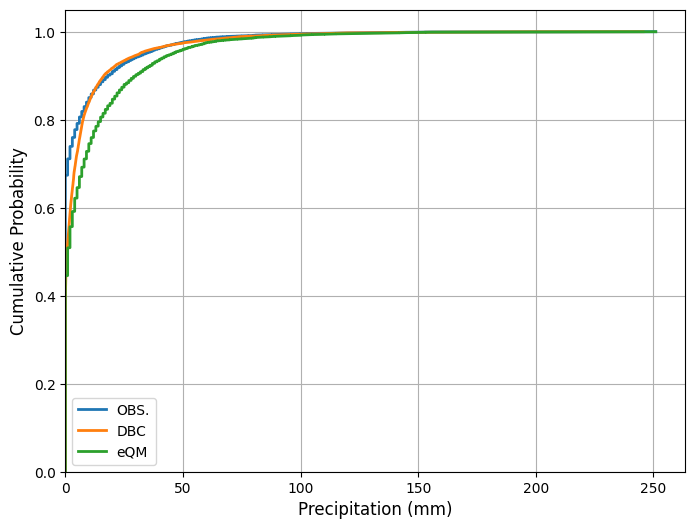

In [ ]:
# fig, ax = plt.subplots(figsize=(8, 6))
# plot_precipitation_cdf(df['Obs. Precipitation'], label='OBS.', ax=ax)
# plot_precipitation_cdf( df['ACCESS-ESM1-5-DBC'], label='DBC', ax=ax)
# plot_precipitation_cdf(df['ACCESS-ESM1-5-eQM'], label='eQM', ax=ax)